# CS4480: Assignment 2 Stereo Pair Disparity Map

In [2]:
import warnings
warnings.filterwarnings("ignore")

import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from skimage.metrics import peak_signal_noise_ratio

## Use Hitnet pretrained with Middleburry Dataset

In [3]:
model_path = "models/middlebury_d400.pb"

In [4]:
# Initialize and load the model
with tf.io.gfile.GFile(model_path, "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())
    
import_graph_def = lambda: tf.compat.v1.import_graph_def(graph_def, name="")
wrapped_import = tf.compat.v1.wrap_function(import_graph_def, [])
import_graph = wrapped_import.graph
 
model = wrapped_import.prune(
		tf.nest.map_structure(import_graph.as_graph_element, "input:0"),
		tf.nest.map_structure(import_graph.as_graph_element, "reference_output_disparity:0"))

2024-05-04 21:31:40.023339: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-05-04 21:31:40.023367: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-04 21:31:40.023374: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-04 21:31:40.023621: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-04 21:31:40.023635: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
def predict_disparity(left_img, right_img):
    # Preprocess the images
    left_img_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
    right_img_rgb = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)
    combined_img = np.concatenate((left_img_rgb, right_img_rgb), axis=-1) / 255
    x = tf.convert_to_tensor(np.expand_dims(combined_img, 0), dtype=tf.float32)
    
    # Get the disparity
    result = model(x)
    
    return np.squeeze(result)

### Image 1

2024-05-04 21:31:44.164424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


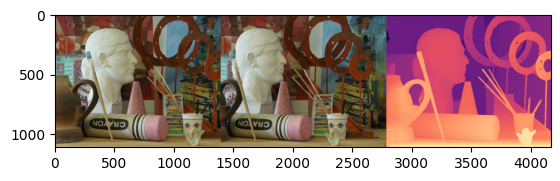

In [6]:
left_img = cv2.imread("dataset/Art/view1.png")
right_img = cv2.imread("dataset/Art/view5.png")

# Estimate the depth
predicted_disparity = predict_disparity(left_img, right_img)

# Convert disparity_map to image format with magma colormap
disparity_img = cv2.normalize(predicted_disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
disparity_img = cv2.applyColorMap(disparity_img, cv2.COLORMAP_MAGMA)

# Plot the disparity map
combined_image = np.hstack((left_img, right_img, disparity_img))
plt.imshow(combined_image[:, :, ::-1])

In [7]:
# Load the true disparity map
true_disparity = cv2.imread("dataset/Art/disp1.png", cv2.IMREAD_GRAYSCALE)

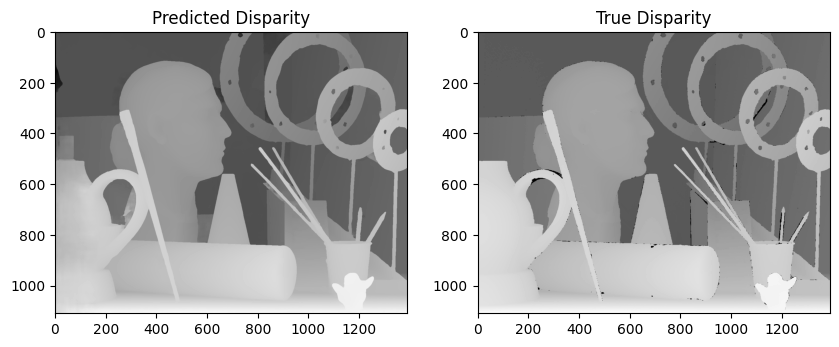

In [8]:
# Plot both true and predicted disparity

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(predicted_disparity, cmap="gray")
plt.title("Predicted Disparity")
plt.subplot(1, 2, 2)
plt.imshow(true_disparity, cmap="gray")
plt.title("True Disparity")
plt.show()

In [9]:
# calculate PSNR
psnr = peak_signal_noise_ratio(true_disparity, predicted_disparity)
print(f"PSNR: {psnr}")

PSNR: 25.94480759218413


In [12]:
# Save Image grayscale
cv2.imwrite("output/disparity_map_art.png", predicted_disparity)

True

### Image 2

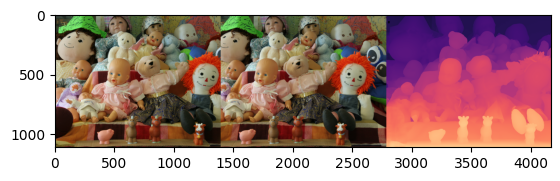

In [13]:
left_img = cv2.imread("dataset/Dolls/view1.png")
right_img = cv2.imread("dataset/Dolls/view5.png")

# Estimate the depth
predicted_disparity = predict_disparity(left_img, right_img)

# Convert disparity_map to image format with magma colormap
disparity_img = cv2.normalize(predicted_disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
disparity_img = cv2.applyColorMap(disparity_img, cv2.COLORMAP_MAGMA)

# Plot the disparity map
combined_image = np.hstack((left_img, right_img, disparity_img))
plt.imshow(combined_image[:, :, ::-1])

In [14]:
# Load the true disparity map
true_disparity = cv2.imread("dataset/Dolls/disp1.png", cv2.IMREAD_GRAYSCALE)

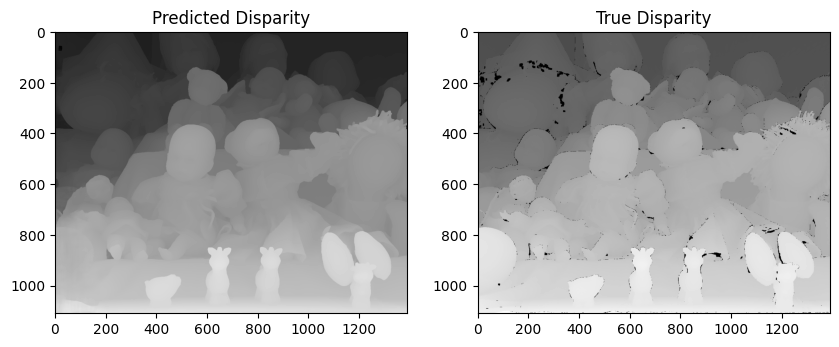

In [15]:
# Plot both true and predicted disparity

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(predicted_disparity, cmap="gray")
plt.title("Predicted Disparity")
plt.subplot(1, 2, 2)
plt.imshow(true_disparity, cmap="gray")
plt.title("True Disparity")
plt.show()

In [16]:
# calculate PSNR
psnr = peak_signal_noise_ratio(true_disparity, predicted_disparity)
print(f"PSNR: {psnr}")

PSNR: 25.143136475869206


In [17]:
# Save Image grayscale
cv2.imwrite("output/disparity_map_dolls.png", predicted_disparity)

True

### Image 3

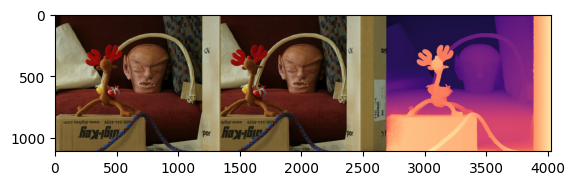

In [18]:
left_img = cv2.imread("dataset/Reindeer/view1.png")
right_img = cv2.imread("dataset/Reindeer/view5.png")

# Estimate the depth
predicted_disparity = predict_disparity(left_img, right_img)

# Convert disparity_map to image format with magma colormap
disparity_img = cv2.normalize(predicted_disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
disparity_img = cv2.applyColorMap(disparity_img, cv2.COLORMAP_MAGMA)

# Plot the disparity map
combined_image = np.hstack((left_img, right_img, disparity_img))
plt.imshow(combined_image[:, :, ::-1])

In [19]:
# Load the true disparity
true_disparity = cv2.imread("dataset/Reindeer/disp1.png", cv2.IMREAD_GRAYSCALE)

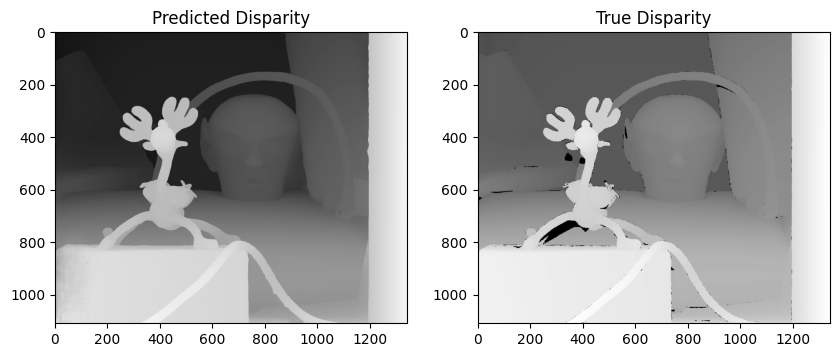

In [20]:
# Plot both true and predicted disparity

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(predicted_disparity, cmap="gray")
plt.title("Predicted Disparity")
plt.subplot(1, 2, 2)
plt.imshow(true_disparity, cmap="gray")
plt.title("True Disparity")
plt.show()

In [21]:
# calculate PSNR
psnr = peak_signal_noise_ratio(true_disparity, predicted_disparity)
print(f"PSNR: {psnr}")

PSNR: 25.941517908446947


In [22]:
# Save Image grayscale
cv2.imwrite("output/disparity_map_reindeer.png", predicted_disparity)

True